In [573]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, label_binarize

Zadanie 1

In [574]:
X, y = make_classification(n_classes=4, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_samples=2000, random_state=6788)

Zadanie 2

In [575]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4912)

In [576]:
classifiers_ovo = [
    OneVsOneClassifier(SVC(kernel='linear', probability=True)),
    OneVsOneClassifier(SVC(kernel='rbf', probability=True)),
    OneVsOneClassifier(LogisticRegression()),
    OneVsOneClassifier(Perceptron())
]

In [577]:
classifiers_ovr = [
    OneVsRestClassifier(SVC(kernel='linear', probability=True)),
    OneVsRestClassifier(SVC(kernel='rbf', probability=True)),
    OneVsRestClassifier(LogisticRegression()),
    OneVsRestClassifier(Perceptron())
]

Zadanie 3

In [578]:
def wykresy(classifiers_list, typ="ovo"):
    accuracy_scores = []
    recall_scores = []
    precision_scores = []
    F1_scores = []
    roc_auc_scores = []
    y_pred_list = []

    for i, clf in enumerate(classifiers_list):
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_pred_list.append(y_pred)

        correct = X_test[y_test == y_pred]
        incorrect = X_test[y_test != y_pred]

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.7)
        ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, alpha=0.7)

        ax3.scatter(correct[:, 0], correct[:, 1], c="mediumseagreen", alpha=0.8, label="Poprawne")
        ax3.scatter(incorrect[:, 0], incorrect[:, 1], c="crimson", alpha=0.8, label="Błędne")

        ax1.set_title('oczekiwane')
        ax2.set_title('obliczone')
        ax3.set_title('różnice');

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred, average="macro"))
        precision_scores.append(precision_score(y_test, y_pred, average="macro"))
        F1_scores.append(f1_score(y_test, y_pred, average="macro"))

        encoder = OneHotEncoder(sparse_output=False)
        y_pred_encoded = encoder.fit_transform(y_pred.reshape(-1, 1))
        y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

        roc_auc_scores.append(roc_auc_score(y_test_encoded, y_pred_encoded))

        fig.suptitle(f"{clf.__class__.__name__} estymator: {clf.estimator.__class__.__name__}")
    
    return accuracy_scores, recall_scores, precision_scores, roc_auc_scores, y_pred_list

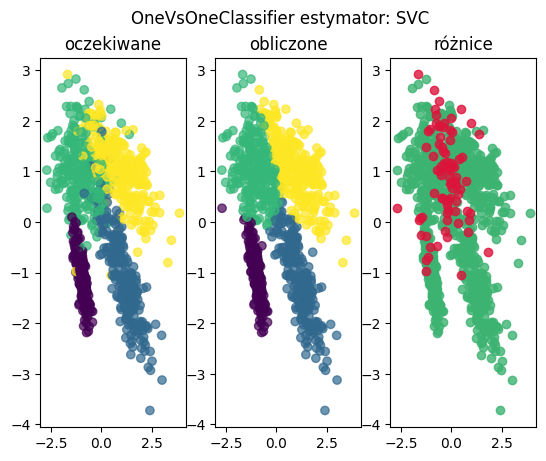

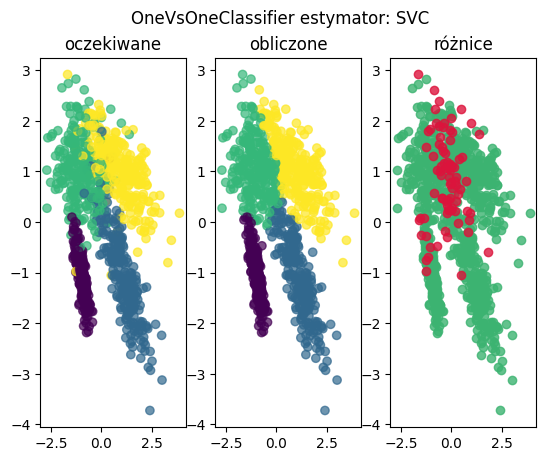

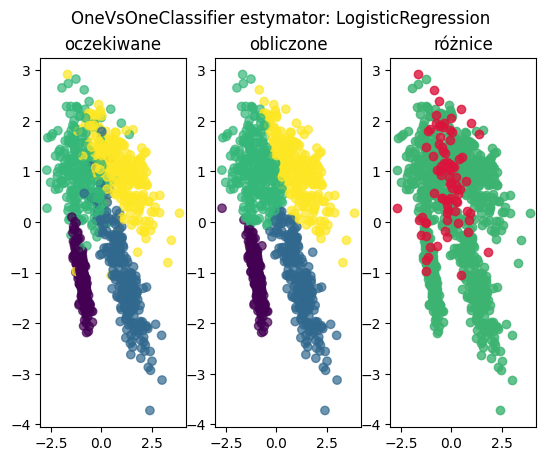

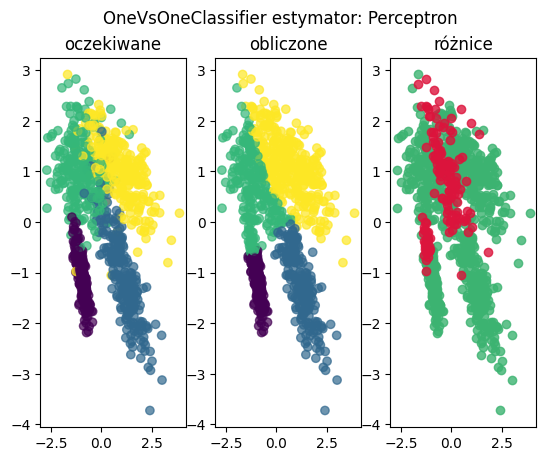

In [579]:
ovo_accuracy, ovo_recall, ovo_precision, ovo_roc_auc, ovo_pred_list = wykresy(classifiers_ovo)

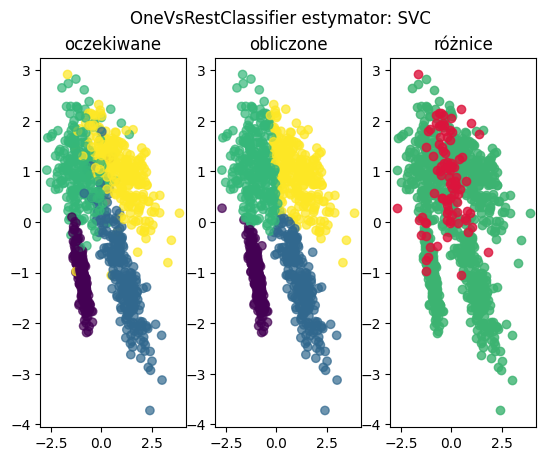

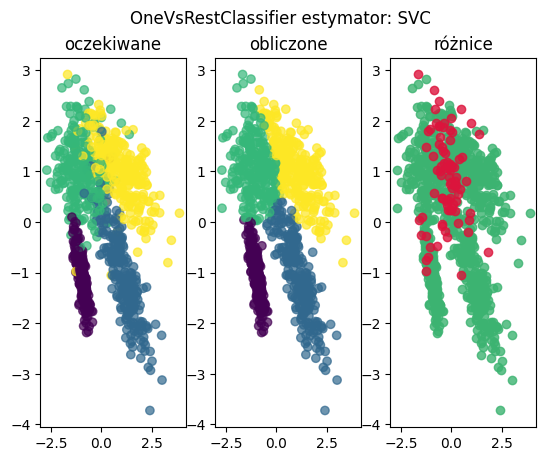

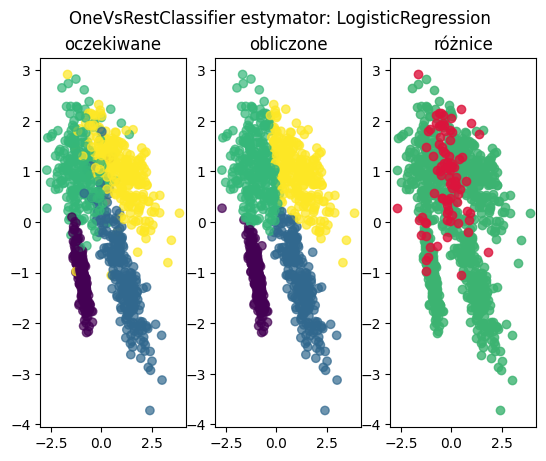

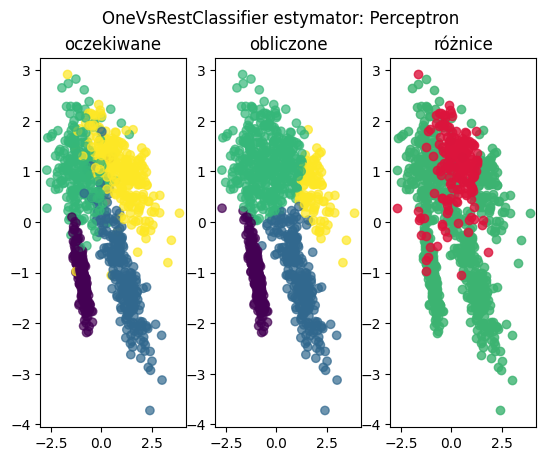

In [580]:
ovr_accuracy, ovr_recall, ovr_precision, ovr_roc_auc, ovr_pred_list = wykresy(classifiers_ovr, "ovr")

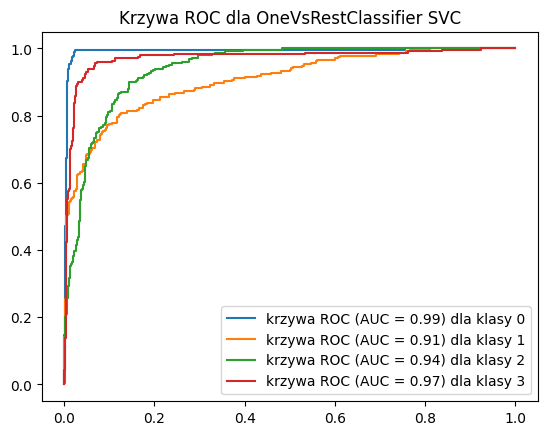

In [581]:
y = label_binarize(y, classes=[0, 1, 2, 3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4912)
clf = classifiers_ovr[0]
y_score = clf.fit(X_train, y_train).decision_function(X_test)

for i in range(4):
    fpr, tpr, thresholds = roc_curve(y_test[:, i], y_score[:, i])

    plt.plot(fpr, tpr, label=f"krzywa ROC (AUC = {round(auc(fpr, tpr), 2)}) dla klasy {i}")

plt.legend()
plt.title(f"Krzywa ROC dla {clf.__class__.__name__} {clf.estimator.__class__.__name__}");